In [1]:
import sklearn.metrics
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

from IPython.display import display, Image

%matplotlib inline

# Стандартные метрики регрессии

- Общая концепция - $\frac1n \sum\limits_{i=1}^n L(a(x_i), y_i)$

-  MAE - Mean Absolute Error - $\frac1n \sum\limits_{i=1}^n |a(x_i) - y_i|$

- MSE - Mean Squared Error - $\frac1n \sum\limits_{i=1}^n (a(x_i) - y_i)^2$

- MAPE - Mean Absolute Percentage Error - $\frac1n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{y_i}$

- sMAPE - symmetric Mean Absolute Percentage Error - $\frac2n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{a(x_i) + y_i}$

Нарисуем функции потерь и попробуем догадаться, каким цветом они обозначены:

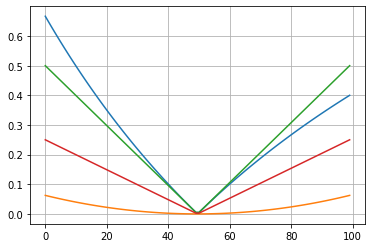

In [2]:
y_true = 0.5
y_pred = np.linspace(y_true * 0.5, y_true * 1.5, 100)

def create_regression_losses(y_true, y_pred, shuffle=True):

    loss1 = [np.abs(y_true - yp) for yp in y_pred]
    loss2 = [(y_true - yp) ** 2 for yp in y_pred]
    loss3 = [np.abs(y_true - yp) / y_true for yp in y_pred]
    loss4 = [2 * np.abs(y_true - yp) / (y_true + yp) for yp in y_pred]
    
    losses = [loss1, loss2, loss3, loss4]
    if shuffle:
        np.random.shuffle(losses)
    return losses

for loss in create_regression_losses(y_true, y_pred):
    plt.plot(loss)

plt.grid()

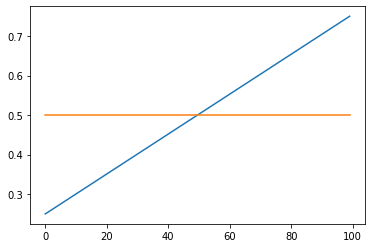

In [3]:
plt.plot(np.linspace(y_true * 0.5, y_true * 1.5, 100))
plt.plot([0.5]*100)

In [4]:
data = load_diabetes()

In [5]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, 
                scoring='neg_mean_absolute_error')

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-46.83851351, -49.01836735, -46.99659864])

In [6]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, 
                scoring='neg_mean_squared_error')

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-3468.86628378, -3659.57190476, -3814.84353741])

In [7]:
cross_val_score(RandomForestRegressor(), data.data, data.target, cv=3, 
                scoring='neg_mean_absolute_percentage_error')

ValueError: 'neg_mean_absolute_percentage_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [8]:
def absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

In [9]:
def symmetric_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred))

In [10]:
cross_val_score(
    RandomForestRegressor(), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(
        absolute_percentage_error, greater_is_better=False)
)

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-0.41468592, -0.46224314, -0.40889484])

In [11]:
cross_val_score(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3,
    scoring=sklearn.metrics.make_scorer(
        symmetric_absolute_percentage_error, greater_is_better=False)
)

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-0.16743818, -0.17669569, -0.16160099])

In [12]:
def smape_scorer(estimator, X, y):
    pred = estimator.predict(X)
    return -symmetric_absolute_percentage_error(y, pred)

In [13]:
cross_val_score(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3, 
    scoring=smape_scorer
)

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-0.16743818, -0.17669569, -0.16160099])

In [14]:
cross_validate(
    RandomForestRegressor(random_state=42), 
    data.data, data.target, 
    cv=3, 
    scoring={
        'smape': smape_scorer,
        'mse': sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better=False)
    },
    return_train_score=True
)

/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tylorn/envs/dmia2019/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([0.02174973, 0.02158213, 0.01991677]),
 'score_time': array([0.0025053 , 0.00237298, 0.00244403]),
 'test_smape': array([-0.16743818, -0.17669569, -0.16160099]),
 'train_smape': array([-0.07723081, -0.07668174, -0.07863809]),
 'test_mse': array([-3303.10033784, -3721.60591837, -3458.50884354]),
 'train_mse': array([-767.06527211, -701.69247458, -795.5359322 ])}

### Blackbox оптимизация
- RandomSearch 
- GridSearch

In [15]:
from catboost import CatBoostRegressor

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
import time

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
clf = CatBoostRegressor(verbose=False, loss_function='MAPE')

param_dist = {"learning_rate": [1e-1, 1e-2],
              "border_count": sp_randint(32, 100),
              "depth": sp_randint(2, 8),
              "l2_leaf_reg": sp_randint(1, 5)
             }
n_iter_search = 10
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, cv=3, 
    scoring=sklearn.metrics.make_scorer(
        absolute_percentage_error, greater_is_better=False)
)

start = time.time()
random_search.fit(data.data, data.target)
report(random_search.cv_results_)
param_grid = {"depth": [4, 6, 8],
              "learning_rate": [1e-1, 1e-2],
              "border_count": [32, 64, 100],
             }
grid_search = GridSearchCV(
    clf, param_grid=param_grid, cv=3, scoring=sklearn.metrics.make_scorer(
        absolute_percentage_error, greater_is_better=False)
)
grid_search.fit(data.data, data.target)
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 36, 'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 70, 'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 73, 'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Model with rank: 1
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 100, 'depth': 4, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 64, 'depth': 4, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 32, 'depth': 4, 'learning_rate': 0.1}



In [19]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 36, 'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 70, 'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.991 (std: 0.000)
Parameters: {'border_count': 73, 'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.1}



In [20]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 100, 'depth': 4, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 64, 'depth': 4, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.992 (std: 0.000)
Parameters: {'border_count': 32, 'depth': 4, 'learning_rate': 0.1}



### Несколько свойств оптимизации метрик регрессии

- $\sum\limits_{i=1}^n \left(a(x_i) - y_i\right)^2 \to \min \implies a(x_i) \approx E(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \left|~a(x_i) - y_i~\right| \to \min \implies a(x_i) \approx median(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \alpha~(a(x_i) - y_i)~I\{a(x_i) \geq y_i\} + (1-\alpha)~(y_i - a(x_i))~I\{a(x_i) < y_i\} \to \min \implies a(x_i) \approx Z_{1 - \alpha}(y \mid x = x_i)$

Пример: пусть есть магазин продуктов, завозим какое-то количество товаров. Хотим при обучении учитывать то, что если привозим слишком много, то продукты портятся (потратили 200 рублей на единицу товара). Если слишком мало, то недополучаем деньги (недополучаем 150 рублей на единицу товара). То есть если $y>a(x)$:  $150(y-a(x))$, если $y <= a(x)$:
$200(a(x)-y)$.

**Докажите утверждения в случаях, если все $x_i$ одинаковые**

### Проверим пару из этих утверждений

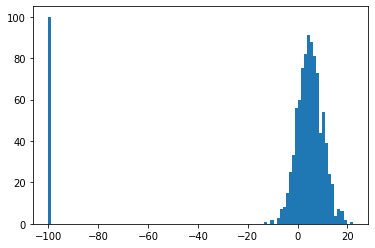

In [21]:
loc, scale = 5, 5
y_true = np.random.normal(loc, scale, 1000)
y_true[:100] = -100
plt.hist(y_true, bins=100);

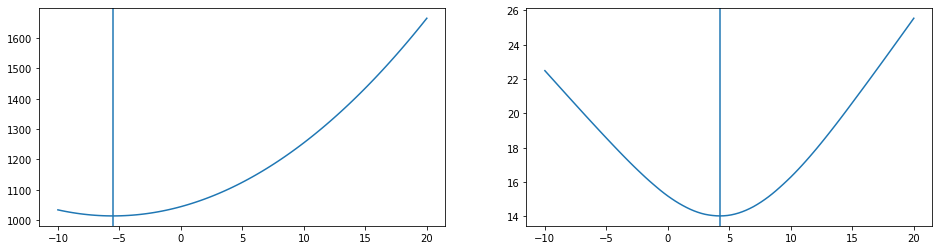

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

y_pred = np.linspace(loc - 3 * scale, loc + 3 * scale, 100)

loss = [np.mean((y_true - yp) ** 2) for yp in y_pred]
axes[0].plot(y_pred, loss)
axes[0].axvline(np.mean(y_true))

loss = [np.mean(np.abs(y_true - yp)) for yp in y_pred]
axes[1].plot(y_pred, loss)
axes[1].axvline(np.median(y_true))

### Как оптимизировать MAPE через оптимизацию MAE?

Пусть p - prediction, t - target, 

Хотим оптимизировать MAPE: $|\frac{p-t}{t}|$.

Будем оптимизировать MAE $|p-t|$ с весами $w = \frac{1}{t}$.

Так устроена оптимизация MAPE в catboost (метод 1го порядка). При обучении на MAPE надо проверять, что в целевой переменной нет нулей ( чтобы избежать деление на 0).

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [25]:
cross_val_score(
    CatBoostRegressor(verbose=False), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(absolute_percentage_error, greater_is_better=False)
)

array([-0.39274294, -0.43348611, -0.37840183])

In [26]:
cross_val_score(
    CatBoostRegressor(verbose=False, loss_function='MAPE'), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(absolute_percentage_error, greater_is_better=False)
)

array([-0.99740445, -0.99749995, -0.99761275])

In [27]:
cross_val_score(
    CatBoostRegressor(verbose=False, loss_function='MAPE', learning_rate=0.1), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(absolute_percentage_error, greater_is_better=False)
)

array([-0.99123152, -0.99152374, -0.99191235])

In [28]:
cross_val_score(
    CatBoostRegressor(verbose=False, loss_function='MAPE', learning_rate=0.01), 
    data.data, data.target, 
    cv=3, 
    scoring=sklearn.metrics.make_scorer(absolute_percentage_error, greater_is_better=False)
)

array([-0.99917188, -0.99920811, -0.99924086])

Пусть p - prediction, t - target, $\delta = p - t.$

Идея: попробуем найти такое преобразование целевой переменной, для которого будет верно: $P - T \approx \frac{p-t}{t},$
где $$P = f(p) = f(t+\delta) \approx f(t) + f^\prime(t) \delta + .. ,$$ 
$$ T = f(t).$$
Тогда в предположении $\delta \rightarrow 0$ имеем: $$P - T \approx f(t) + f^\prime(t) \delta - f(t) \approx \frac{p-t}{t}$$

$$\left( f^\prime(t) \delta \approx \frac{\delta}{t}; f^\prime(t) \approx \frac{1}{t} \right)$$

$$f(t) \approx \log(t) + C$$


Таким образом, минимизируя $MAE = \frac{1}{n} \sum_{i=1}^n |P_i - T_i|$ для $\log(t),$ будем минимизировать $MAPE = \frac{100}{n}\sum_{i=1}^n |\frac{p_i - t_i}{t_i}|$ для $t$ А смещение этой аппроксимации $C$ подберем по валидации/фолдам. 

Методами 2го порядка (например, xgboost) оптимизировать MAE напрямую не получится

### Аппроксимации MAE

$$|x| \approx \ln(\cosh(x))$$

$$|x| \approx \dfrac{c^2\ln\left(\frac{x^2}{c^2}+1\right)}{2} $$

$$|x| \approx c^2\left(\dfrac{\left|x\right|}{c}-\ln\left(\dfrac{\left|x\right|}{c}+1\right)\right)$$


Text(0.5, 1.0, 'fair')

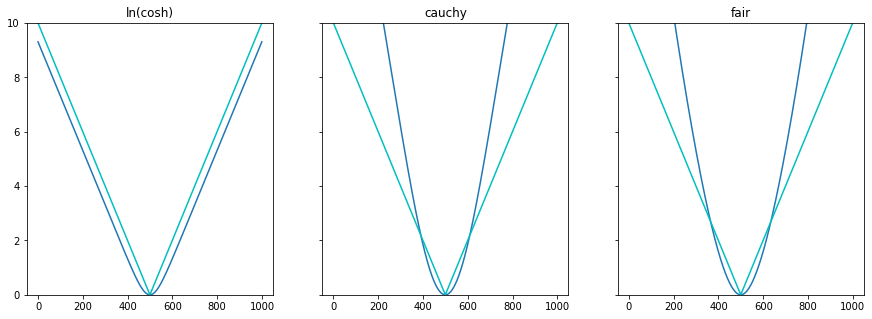

In [29]:
def log_cosh_loss(x):
    return np.log(np.cosh(x))

c=5
def cauchy_loss(x):
    return c ** 2 * np.log(x ** 2 * 1./ c ** 2 + 1) / 2


def fair_loss(x):
    return c ** 2 * (np.abs(x) *1. / c - np.log(np.abs(x) * 1. / c + 1) )


_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.set_ylim([0, 10])

ax1.plot(list(map(log_cosh_loss, np.linspace(-10, 10, 1000))))
ax1.plot(list(map(abs, np.linspace(-10, 10, 1000))), color='c')
ax1.set_title('ln(cosh)')

ax2.plot(list(map(cauchy_loss, np.linspace(-10, 10, 1000))))
ax2.plot(list(map(abs, np.linspace(-10, 10, 1000))), color='c')
ax2.set_title('cauchy')

ax3.plot(list(map(fair_loss, np.linspace(-10, 10, 1000))))
ax3.plot(list(map(abs, np.linspace(-10, 10, 1000))), color='c')
ax3.set_title('fair')

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

def eval_mae_log(preds, dtrain):
    y = dtrain.get_label()
    return 'mae on log', mean_absolute_error(y, preds)
    
def logcoshobj(preds, dtrain):
    labels = dtrain.get_label()
    grad = np.tanh(preds-labels)
    hess  =  1. - grad * grad
    return grad, hess


fair_constant = 100 #the lower the "slower/smoother" loss

def cauchy_obj(preds, dtrain):
    labels = dtrain.get_label()
    x  = preds-labels
    grad = x / (x ** 2 / fair_constant ** 2 + 1)
    hess = -fair_constant ** 2 * (x ** 2 - fair_constant ** 2) / (x ** 2 + fair_constant ** 2) ** 2
    return grad, hess

def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

def get_params():
    params = {}
    params["objective"] = "reg:linear"
    params["booster"] = "dart" 
    params["feval"] = eval_mae_log
    params["num_boost_round"] = 1000
    params["max_depth"] = 14 
    params["eta"] = 0.55 
    params["gamma"] = 1 
    params["lambda"] = 0.9  
    params["alpha"] = 0.2 
    params["seed"] = 0
    params['normalize_type'] = 'forest'
    params["min_child_weight"] = 1
    params["base_score"] = 10
    params["subsample"] = 1
    return params

In [31]:
for loss in [fair_obj, logcoshobj, cauchy_obj]:
    xgtrain = xgb.DMatrix(X_train, label=np.log(y_train))
    xgval = xgb.DMatrix(X_test, label=np.log(y_test))
    bst = xgb.train(get_params(), xgtrain, obj=loss)
    pred_val = bst.predict(xgval)
    print (min([absolute_percentage_error(y_test, np.exp(pred_val) * c) for c in np.linspace(0, 2, 1000)]))

[18:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.36280133342151827
[18:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.0
[18:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.35498931999279776


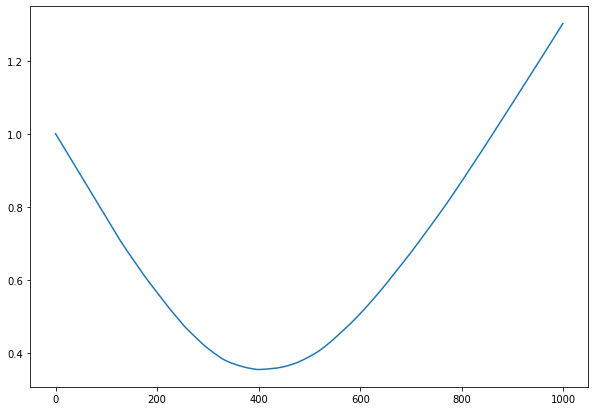

In [32]:
mp = [absolute_percentage_error(y_test, np.exp(pred_val) * c) 
      for c in np.linspace(0, 2, 1000)]

plt.figure(figsize=(10, 7))
plt.plot(np.array(mp))

In [33]:
np.linspace(0, 2, 1000)[np.array(mp).argmin()]

0.7987987987987988

Как еще можно подобрать оптимальную константу C?

In [34]:
from scipy.optimize import minimize 

fun = lambda alpha: absolute_percentage_error(y_test, alpha * np.exp(pred_val))
res = minimize(fun, [0.8], method='Nelder-Mead')
print ('best param alpha = {}'.format(res.x))
print ('best mape = {}'.format(res.fun))

best param alpha = [0.79734375]
best mape = 0.3549826984873154


In [36]:
import hyperopt
from scipy.optimize import differential_evolution 

### Использовать три основных подхода к оптимизации "чёрного ящика": hyperopt, scipy.optimize.minimize и scipy.optimize.differential_evolution

Дифференциальная эволюция {https://ru.wikipedia.org/wiki/Дифференциальная_эволюция} 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
- стохастический алгоритм оптимизации для нахождения глобального минимума (или максимума) недифференцируемых, нелинейных, мультимодальных (имеющих, возможно, большое число локальных экстремумов) функций от многих переменных
- требует только возможности вычислять значения целевой функций (не её производных)

In [37]:
X_train_add = np.ones((X_train.shape[0], X_train.shape[1]+1))
X_train_add[:, :-1] = X_train
X_test_add = np.ones((X_test.shape[0], X_test.shape[1]+1))
X_test_add[:, :-1] = X_test

num_coeff = X_train.shape[1] + 1

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False).fit(X_train_add, y_train)
print(absolute_percentage_error(y_test, lr.predict(X_test_add)))
print (absolute_percentage_error(y_train, lr.predict(X_train_add)))

0.44645547938197905
0.37516026214935255


In [39]:
import scipy.optimize

In [40]:
DEFAULT_SAMPLES_COUNT = 10

def func_4_optimization(coeffs):
    coeffs = np.array(coeffs)
    pred = np.dot(X_train_add, coeffs)
    return absolute_percentage_error(y_train, pred)

- На каждой итерации берем поколение. Для каждого вектора из старого поколения выбираем 3 случайных
- Создаем mutant vector:

$v = v_1 + F (v_2 - v_3)$
- Делаем скрещивание (некоторые координаты замещаем координатой исходного вектора)
- Проверяем, лучше ли оказался получившийся вектор. Если лучше, заменяем им исходный

Основные параметры:
    - popsize 
    - mutation [0, 2]
    - recombination [0, 1]

In [41]:
def scipy_differential_evolution_exp(samples_count=DEFAULT_SAMPLES_COUNT, **kwargs):
    best_result = None
    for seed in range(samples_count):
        result = scipy.optimize.differential_evolution(
            func_4_optimization, 
            bounds=[(-700, 700)] * num_coeff,
            seed=seed,
            **kwargs
        )
        if best_result is None or result.fun < best_result.fun:
            best_result = result
    print ('Best point:', best_result.x)
    print ('Best value:', func_4_optimization(best_result.x))
    print ()
    
def diff_evolution_experiment_1(maxiter, popsize, strategy='best1bin'):
    scipy_differential_evolution_exp(maxiter=maxiter, popsize=popsize, strategy=strategy)

In [42]:
diff_evolution_experiment_1(1000, 15, 'best1bin')

Best point: [ -22.75031605 -274.5563123   398.84315327  210.4558161   570.63802003
 -626.28946585 -391.40166729  177.01825602  351.915117   -122.94708847
  122.70182189]
Best value: 0.32760623770422975



In [43]:
diff_evolution_experiment_1(1000, 15, 'best2bin')

Best point: [  -8.73743365 -262.66642064  440.54671629  209.60294118  383.01697596
 -492.57112177 -321.65814846  154.85119521  409.44426324 -112.59798137
  122.85213941]
Best value: 0.32755638614760163



In [44]:
diff_evolution_experiment_1(maxiter=1000, popsize=15, strategy='best1exp')

Best point: [ -10.23765362 -254.70859188  448.99673696  214.00352494  439.50619902
 -547.1895489  -300.35110488  226.91040914  353.83383479 -112.14888016
  122.66319455]
Best value: 0.32758560192657427



Градиентные методы плохо ищут решения, но хорошо дотюнивают, имея неплохое начальное приближение.

Попробуйте подать в SGDRegressor начальные веса от одной из функций (используйте параметр warn_start в SGDRegressor и coef_init в fit)

### hyperopt
- позволяет описывать пространство параметров, в котором ищем минимум

In [52]:
from hyperopt import hp, fmin, Trials, tpe
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, base
base.have_bson = False

In [55]:
def run_val(params):
    bst_params = {
        'loss_function': 'MAPE', 
        'learning_rate': params['learning_rate'], 
        'verbose': False
    }
    ctb_model = CatBoostRegressor(**bst_params).fit(X_train, y_train)
    result = {
        'mape': absolute_percentage_error(y_test, ctb_model.predict(X_test)), 
        'status': STATUS_OK, 
        'loss': absolute_percentage_error(y_test, ctb_model.predict(X_test))
    }
    return result

In [57]:
space = {
    'learning_rate': hp.uniform('learning_rate', 0, 1)
}

trials = Trials()

_ = fmin(fn=lambda params: run_val(params), space=space, algo=tpe.suggest, 
         max_evals=10, trials=trials)#, rseed=1)

100%|██████████| 10/10 [00:38<00:00,  3.89s/it, best loss: 0.9176719127803327]


In [58]:
_

{'learning_rate': 0.963479220976615}

In [59]:
trials.best_trial

{'state': 2,
 'tid': 3,
 'spec': None,
 'result': {'mape': 0.9176719127803327,
  'status': 'ok',
  'loss': 0.9176719127803327},
 'misc': {'tid': 3,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'learning_rate': [3]},
  'vals': {'learning_rate': [0.963479220976615]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2019, 10, 25, 15, 51, 44, 868000),
 'refresh_time': datetime.datetime(2019, 10, 25, 15, 51, 48, 686000)}

In [60]:
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'mape': 0.9693839603866333,
   'status': 'ok',
   'loss': 0.9693839603866333},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'learning_rate': [0]},
   'vals': {'learning_rate': [0.35882277472710056]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2019, 10, 25, 15, 51, 33, 972000),
  'refresh_time': datetime.datetime(2019, 10, 25, 15, 51, 37, 613000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'mape': 0.9733574284689234,
   'status': 'ok',
   'loss': 0.9733574284689234},
  'misc': {'tid': 1,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'learning_rate': [1]},
   'vals': {'learning_rate': [0.3122695818981942]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2019, 10, 25, 15, 51, 37, 615000),
  'refresh_time': datetime.datetime(2019, 10, 25, 15, 51,

## Кастомные лоссы в NN

In [61]:
import tensorflow as tf
import keras.losses

def mape(y_true, y_pred):
    loss = tf.divide(tf.abs(y_true - y_pred), y_true)
    return tf.reduce_mean(loss, axis=-1)

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [62]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [63]:
keras.losses.mape = mape
model.compile(optimizer='adam', loss=mape, metrics=['mape'])
history = model.fit(X_train, y_train, epochs=500, validation_data=[X_test, y_test])

Train on 331 samples, validate on 111 samples
Epoch 1/500
331/331 [==============================] - 0s 480us/step - loss: 0.9999 - mape: 99.9940 - val_loss: 0.9996 - val_mape: 99.9635
Epoch 2/500
331/331 [==============================] - 0s 47us/step - loss: 0.9994 - mape: 99.9388 - val_loss: 0.9990 - val_mape: 99.9016
Epoch 3/500
331/331 [==============================] - 0s 44us/step - loss: 0.9987 - mape: 99.8738 - val_loss: 0.9982 - val_mape: 99.8250
Epoch 4/500
331/331 [==============================] - 0s 42us/step - loss: 0.9979 - mape: 99.7911 - val_loss: 0.9972 - val_mape: 99.7243
Epoch 5/500
331/331 [==============================] - 0s 43us/step - loss: 0.9968 - mape: 99.6816 - val_loss: 0.9959 - val_mape: 99.5939
Epoch 6/500
331/331 [==============================] - 0s 41us/step - loss: 0.9954 - mape: 99.5393 - val_loss: 0.9943 - val_mape: 99.4256
Epoch 7/500
331/331 [==============================] - 0s 41us/step - loss: 0.9936 - mape: 99.3635 - val_loss: 0.9921 - val_m

331/331 [==============================] - 0s 34us/step - loss: 0.4500 - mape: 45.0034 - val_loss: 0.4518 - val_mape: 45.1820
Epoch 60/500
331/331 [==============================] - 0s 35us/step - loss: 0.4484 - mape: 44.8355 - val_loss: 0.4499 - val_mape: 44.9897
Epoch 61/500
331/331 [==============================] - 0s 40us/step - loss: 0.4467 - mape: 44.6665 - val_loss: 0.4483 - val_mape: 44.8305
Epoch 62/500
331/331 [==============================] - 0s 38us/step - loss: 0.4450 - mape: 44.5006 - val_loss: 0.4466 - val_mape: 44.6637
Epoch 63/500
331/331 [==============================] - 0s 39us/step - loss: 0.4436 - mape: 44.3617 - val_loss: 0.4449 - val_mape: 44.4901
Epoch 64/500
331/331 [==============================] - 0s 36us/step - loss: 0.4420 - mape: 44.2025 - val_loss: 0.4437 - val_mape: 44.3665
Epoch 65/500
331/331 [==============================] - 0s 37us/step - loss: 0.4407 - mape: 44.0735 - val_loss: 0.4425 - val_mape: 44.2502
Epoch 66/500
331/331 [==================

Epoch 118/500
331/331 [==============================] - 0s 38us/step - loss: 0.3869 - mape: 38.6865 - val_loss: 0.3902 - val_mape: 39.0185
Epoch 119/500
331/331 [==============================] - 0s 37us/step - loss: 0.3862 - mape: 38.6236 - val_loss: 0.3897 - val_mape: 38.9664
Epoch 120/500
331/331 [==============================] - 0s 38us/step - loss: 0.3857 - mape: 38.5714 - val_loss: 0.3894 - val_mape: 38.9362
Epoch 121/500
331/331 [==============================] - 0s 35us/step - loss: 0.3851 - mape: 38.5091 - val_loss: 0.3889 - val_mape: 38.8873
Epoch 122/500
331/331 [==============================] - 0s 35us/step - loss: 0.3847 - mape: 38.4668 - val_loss: 0.3885 - val_mape: 38.8534
Epoch 123/500
331/331 [==============================] - 0s 35us/step - loss: 0.3839 - mape: 38.3925 - val_loss: 0.3880 - val_mape: 38.7999
Epoch 124/500
331/331 [==============================] - 0s 32us/step - loss: 0.3834 - mape: 38.3388 - val_loss: 0.3874 - val_mape: 38.7373
Epoch 125/500
331/33

331/331 [==============================] - 0s 40us/step - loss: 0.3623 - mape: 36.2271 - val_loss: 0.3739 - val_mape: 37.3949
Epoch 177/500
331/331 [==============================] - 0s 40us/step - loss: 0.3619 - mape: 36.1905 - val_loss: 0.3738 - val_mape: 37.3822
Epoch 178/500
331/331 [==============================] - 0s 38us/step - loss: 0.3615 - mape: 36.1533 - val_loss: 0.3737 - val_mape: 37.3676
Epoch 179/500
331/331 [==============================] - 0s 40us/step - loss: 0.3611 - mape: 36.1085 - val_loss: 0.3735 - val_mape: 37.3528
Epoch 180/500
331/331 [==============================] - 0s 42us/step - loss: 0.3609 - mape: 36.0871 - val_loss: 0.3734 - val_mape: 37.3383
Epoch 181/500
331/331 [==============================] - 0s 41us/step - loss: 0.3604 - mape: 36.0373 - val_loss: 0.3732 - val_mape: 37.3196
Epoch 182/500
331/331 [==============================] - 0s 38us/step - loss: 0.3600 - mape: 35.9977 - val_loss: 0.3730 - val_mape: 37.3011
Epoch 183/500
331/331 [===========

331/331 [==============================] - 0s 39us/step - loss: 0.3429 - mape: 34.2876 - val_loss: 0.3692 - val_mape: 36.9193
Epoch 235/500
331/331 [==============================] - 0s 37us/step - loss: 0.3426 - mape: 34.2645 - val_loss: 0.3693 - val_mape: 36.9296
Epoch 236/500
331/331 [==============================] - 0s 36us/step - loss: 0.3423 - mape: 34.2339 - val_loss: 0.3692 - val_mape: 36.9194
Epoch 237/500
331/331 [==============================] - 0s 37us/step - loss: 0.3421 - mape: 34.2133 - val_loss: 0.3691 - val_mape: 36.9127
Epoch 238/500
331/331 [==============================] - 0s 37us/step - loss: 0.3418 - mape: 34.1828 - val_loss: 0.3693 - val_mape: 36.9270
Epoch 239/500
331/331 [==============================] - 0s 35us/step - loss: 0.3416 - mape: 34.1606 - val_loss: 0.3693 - val_mape: 36.9287
Epoch 240/500
331/331 [==============================] - 0s 34us/step - loss: 0.3415 - mape: 34.1468 - val_loss: 0.3695 - val_mape: 36.9531
Epoch 241/500
331/331 [===========

331/331 [==============================] - 0s 43us/step - loss: 0.3310 - mape: 33.0952 - val_loss: 0.3705 - val_mape: 37.0549
Epoch 293/500
331/331 [==============================] - 0s 43us/step - loss: 0.3309 - mape: 33.0876 - val_loss: 0.3705 - val_mape: 37.0537
Epoch 294/500
331/331 [==============================] - 0s 39us/step - loss: 0.3307 - mape: 33.0699 - val_loss: 0.3705 - val_mape: 37.0541
Epoch 295/500
331/331 [==============================] - 0s 40us/step - loss: 0.3306 - mape: 33.0572 - val_loss: 0.3706 - val_mape: 37.0554
Epoch 296/500
331/331 [==============================] - 0s 37us/step - loss: 0.3305 - mape: 33.0466 - val_loss: 0.3705 - val_mape: 37.0542
Epoch 297/500
331/331 [==============================] - 0s 38us/step - loss: 0.3304 - mape: 33.0380 - val_loss: 0.3705 - val_mape: 37.0536
Epoch 298/500
331/331 [==============================] - 0s 38us/step - loss: 0.3303 - mape: 33.0321 - val_loss: 0.3705 - val_mape: 37.0530
Epoch 299/500
331/331 [===========

331/331 [==============================] - 0s 48us/step - loss: 0.3251 - mape: 32.5068 - val_loss: 0.3706 - val_mape: 37.0572
Epoch 351/500
331/331 [==============================] - 0s 50us/step - loss: 0.3250 - mape: 32.5006 - val_loss: 0.3706 - val_mape: 37.0638
Epoch 352/500
331/331 [==============================] - 0s 53us/step - loss: 0.3249 - mape: 32.4936 - val_loss: 0.3708 - val_mape: 37.0764
Epoch 353/500
331/331 [==============================] - 0s 48us/step - loss: 0.3248 - mape: 32.4752 - val_loss: 0.3707 - val_mape: 37.0662
Epoch 354/500
331/331 [==============================] - 0s 52us/step - loss: 0.3247 - mape: 32.4713 - val_loss: 0.3705 - val_mape: 37.0548
Epoch 355/500
331/331 [==============================] - 0s 46us/step - loss: 0.3246 - mape: 32.4619 - val_loss: 0.3706 - val_mape: 37.0591
Epoch 356/500
331/331 [==============================] - 0s 56us/step - loss: 0.3245 - mape: 32.4478 - val_loss: 0.3706 - val_mape: 37.0575
Epoch 357/500
331/331 [===========

331/331 [==============================] - 0s 39us/step - loss: 0.3206 - mape: 32.0579 - val_loss: 0.3697 - val_mape: 36.9747
Epoch 409/500
331/331 [==============================] - 0s 37us/step - loss: 0.3207 - mape: 32.0671 - val_loss: 0.3698 - val_mape: 36.9824
Epoch 410/500
331/331 [==============================] - 0s 37us/step - loss: 0.3205 - mape: 32.0537 - val_loss: 0.3698 - val_mape: 36.9802
Epoch 411/500
331/331 [==============================] - 0s 38us/step - loss: 0.3204 - mape: 32.0412 - val_loss: 0.3697 - val_mape: 36.9748
Epoch 412/500
331/331 [==============================] - 0s 39us/step - loss: 0.3203 - mape: 32.0281 - val_loss: 0.3697 - val_mape: 36.9723
Epoch 413/500
331/331 [==============================] - 0s 41us/step - loss: 0.3203 - mape: 32.0276 - val_loss: 0.3698 - val_mape: 36.9829
Epoch 414/500
331/331 [==============================] - 0s 38us/step - loss: 0.3202 - mape: 32.0230 - val_loss: 0.3698 - val_mape: 36.9839
Epoch 415/500
331/331 [===========

331/331 [==============================] - 0s 42us/step - loss: 0.3183 - mape: 31.8321 - val_loss: 0.3676 - val_mape: 36.7598
Epoch 467/500
331/331 [==============================] - 0s 43us/step - loss: 0.3182 - mape: 31.8209 - val_loss: 0.3674 - val_mape: 36.7447
Epoch 468/500
331/331 [==============================] - 0s 42us/step - loss: 0.3182 - mape: 31.8202 - val_loss: 0.3673 - val_mape: 36.7270
Epoch 469/500
331/331 [==============================] - 0s 42us/step - loss: 0.3184 - mape: 31.8364 - val_loss: 0.3671 - val_mape: 36.7076
Epoch 470/500
331/331 [==============================] - 0s 40us/step - loss: 0.3181 - mape: 31.8110 - val_loss: 0.3671 - val_mape: 36.7116
Epoch 471/500
331/331 [==============================] - 0s 40us/step - loss: 0.3182 - mape: 31.8204 - val_loss: 0.3672 - val_mape: 36.7176
Epoch 472/500
331/331 [==============================] - 0s 37us/step - loss: 0.3180 - mape: 31.8036 - val_loss: 0.3671 - val_mape: 36.7135
Epoch 473/500
331/331 [===========

In [64]:
history.history.keys()

dict_keys(['val_loss', 'val_mape', 'loss', 'mape'])

In [65]:
keras.losses.mape = mape
model.compile(optimizer='adam', loss=mape, metrics=['mape'])
history = model.fit(X_train, y_train, epochs=500, validation_data=[X_test, y_test])

Train on 331 samples, validate on 111 samples
Epoch 1/500
331/331 [==============================] - 0s 351us/step - loss: 0.3176 - mape: 31.7648 - val_loss: 0.3659 - val_mape: 36.5923
Epoch 2/500
331/331 [==============================] - 0s 43us/step - loss: 0.3173 - mape: 31.7298 - val_loss: 0.3660 - val_mape: 36.5952
Epoch 3/500
331/331 [==============================] - 0s 42us/step - loss: 0.3172 - mape: 31.7224 - val_loss: 0.3659 - val_mape: 36.5924
Epoch 4/500
331/331 [==============================] - 0s 41us/step - loss: 0.3171 - mape: 31.7133 - val_loss: 0.3659 - val_mape: 36.5937
Epoch 5/500
331/331 [==============================] - 0s 40us/step - loss: 0.3171 - mape: 31.7076 - val_loss: 0.3659 - val_mape: 36.5894
Epoch 6/500
331/331 [==============================] - 0s 41us/step - loss: 0.3171 - mape: 31.7099 - val_loss: 0.3659 - val_mape: 36.5862
Epoch 7/500
331/331 [==============================] - 0s 42us/step - loss: 0.3170 - mape: 31.6966 - val_loss: 0.3659 - val_m

331/331 [==============================] - 0s 37us/step - loss: 0.3158 - mape: 31.5821 - val_loss: 0.3643 - val_mape: 36.4295
Epoch 60/500
331/331 [==============================] - 0s 36us/step - loss: 0.3156 - mape: 31.5623 - val_loss: 0.3644 - val_mape: 36.4376
Epoch 61/500
331/331 [==============================] - 0s 37us/step - loss: 0.3158 - mape: 31.5809 - val_loss: 0.3643 - val_mape: 36.4349
Epoch 62/500
331/331 [==============================] - 0s 37us/step - loss: 0.3157 - mape: 31.5721 - val_loss: 0.3642 - val_mape: 36.4235
Epoch 63/500
331/331 [==============================] - 0s 37us/step - loss: 0.3157 - mape: 31.5734 - val_loss: 0.3642 - val_mape: 36.4205
Epoch 64/500
331/331 [==============================] - 0s 37us/step - loss: 0.3157 - mape: 31.5655 - val_loss: 0.3643 - val_mape: 36.4252
Epoch 65/500
331/331 [==============================] - 0s 35us/step - loss: 0.3156 - mape: 31.5571 - val_loss: 0.3641 - val_mape: 36.4149
Epoch 66/500
331/331 [==================

Epoch 118/500
331/331 [==============================] - 0s 35us/step - loss: 0.3146 - mape: 31.4624 - val_loss: 0.3627 - val_mape: 36.2687
Epoch 119/500
331/331 [==============================] - 0s 34us/step - loss: 0.3147 - mape: 31.4742 - val_loss: 0.3626 - val_mape: 36.2630
Epoch 120/500
331/331 [==============================] - 0s 37us/step - loss: 0.3146 - mape: 31.4592 - val_loss: 0.3626 - val_mape: 36.2641
Epoch 121/500
331/331 [==============================] - 0s 33us/step - loss: 0.3145 - mape: 31.4534 - val_loss: 0.3626 - val_mape: 36.2582
Epoch 122/500
331/331 [==============================] - 0s 35us/step - loss: 0.3146 - mape: 31.4605 - val_loss: 0.3626 - val_mape: 36.2563
Epoch 123/500
331/331 [==============================] - 0s 35us/step - loss: 0.3145 - mape: 31.4452 - val_loss: 0.3626 - val_mape: 36.2571
Epoch 124/500
331/331 [==============================] - 0s 35us/step - loss: 0.3146 - mape: 31.4561 - val_loss: 0.3625 - val_mape: 36.2529
Epoch 125/500
331/33

331/331 [==============================] - 0s 35us/step - loss: 0.3136 - mape: 31.3564 - val_loss: 0.3610 - val_mape: 36.0990
Epoch 177/500
331/331 [==============================] - 0s 37us/step - loss: 0.3137 - mape: 31.3714 - val_loss: 0.3609 - val_mape: 36.0939
Epoch 178/500
331/331 [==============================] - 0s 35us/step - loss: 0.3137 - mape: 31.3664 - val_loss: 0.3609 - val_mape: 36.0925
Epoch 179/500
331/331 [==============================] - 0s 36us/step - loss: 0.3136 - mape: 31.3553 - val_loss: 0.3609 - val_mape: 36.0900
Epoch 180/500
331/331 [==============================] - 0s 33us/step - loss: 0.3135 - mape: 31.3529 - val_loss: 0.3609 - val_mape: 36.0899
Epoch 181/500
331/331 [==============================] - 0s 34us/step - loss: 0.3135 - mape: 31.3528 - val_loss: 0.3609 - val_mape: 36.0890
Epoch 182/500
331/331 [==============================] - 0s 34us/step - loss: 0.3135 - mape: 31.3508 - val_loss: 0.3609 - val_mape: 36.0892
Epoch 183/500
331/331 [===========

331/331 [==============================] - 0s 39us/step - loss: 0.3126 - mape: 31.2573 - val_loss: 0.3593 - val_mape: 35.9284
Epoch 235/500
331/331 [==============================] - 0s 36us/step - loss: 0.3126 - mape: 31.2640 - val_loss: 0.3592 - val_mape: 35.9239
Epoch 236/500
331/331 [==============================] - 0s 37us/step - loss: 0.3123 - mape: 31.2345 - val_loss: 0.3593 - val_mape: 35.9269
Epoch 237/500
331/331 [==============================] - 0s 37us/step - loss: 0.3125 - mape: 31.2540 - val_loss: 0.3592 - val_mape: 35.9213
Epoch 238/500
331/331 [==============================] - 0s 35us/step - loss: 0.3125 - mape: 31.2465 - val_loss: 0.3592 - val_mape: 35.9160
Epoch 239/500
331/331 [==============================] - 0s 33us/step - loss: 0.3123 - mape: 31.2349 - val_loss: 0.3591 - val_mape: 35.9073
Epoch 240/500
331/331 [==============================] - 0s 36us/step - loss: 0.3124 - mape: 31.2407 - val_loss: 0.3591 - val_mape: 35.9051
Epoch 241/500
331/331 [===========

331/331 [==============================] - 0s 34us/step - loss: 0.3112 - mape: 31.1221 - val_loss: 0.3573 - val_mape: 35.7329
Epoch 293/500
331/331 [==============================] - 0s 34us/step - loss: 0.3115 - mape: 31.1459 - val_loss: 0.3573 - val_mape: 35.7312
Epoch 294/500
331/331 [==============================] - 0s 34us/step - loss: 0.3114 - mape: 31.1437 - val_loss: 0.3573 - val_mape: 35.7332
Epoch 295/500
331/331 [==============================] - 0s 34us/step - loss: 0.3114 - mape: 31.1376 - val_loss: 0.3573 - val_mape: 35.7321
Epoch 296/500
331/331 [==============================] - 0s 35us/step - loss: 0.3113 - mape: 31.1337 - val_loss: 0.3573 - val_mape: 35.7316
Epoch 297/500
331/331 [==============================] - 0s 35us/step - loss: 0.3113 - mape: 31.1324 - val_loss: 0.3573 - val_mape: 35.7305
Epoch 298/500
331/331 [==============================] - 0s 34us/step - loss: 0.3114 - mape: 31.1397 - val_loss: 0.3572 - val_mape: 35.7249
Epoch 299/500
331/331 [===========

331/331 [==============================] - 0s 50us/step - loss: 0.3106 - mape: 31.0585 - val_loss: 0.3559 - val_mape: 35.5942
Epoch 351/500
331/331 [==============================] - 0s 50us/step - loss: 0.3106 - mape: 31.0570 - val_loss: 0.3559 - val_mape: 35.5896
Epoch 352/500
331/331 [==============================] - 0s 53us/step - loss: 0.3105 - mape: 31.0544 - val_loss: 0.3559 - val_mape: 35.5900
Epoch 353/500
331/331 [==============================] - 0s 48us/step - loss: 0.3105 - mape: 31.0545 - val_loss: 0.3559 - val_mape: 35.5919
Epoch 354/500
331/331 [==============================] - 0s 44us/step - loss: 0.3105 - mape: 31.0520 - val_loss: 0.3559 - val_mape: 35.5882
Epoch 355/500
331/331 [==============================] - 0s 48us/step - loss: 0.3105 - mape: 31.0529 - val_loss: 0.3559 - val_mape: 35.5856
Epoch 356/500
331/331 [==============================] - 0s 50us/step - loss: 0.3106 - mape: 31.0635 - val_loss: 0.3559 - val_mape: 35.5943
Epoch 357/500
331/331 [===========

331/331 [==============================] - 0s 40us/step - loss: 0.3099 - mape: 30.9927 - val_loss: 0.3546 - val_mape: 35.4647
Epoch 409/500
331/331 [==============================] - 0s 37us/step - loss: 0.3099 - mape: 30.9894 - val_loss: 0.3547 - val_mape: 35.4669
Epoch 410/500
331/331 [==============================] - 0s 37us/step - loss: 0.3099 - mape: 30.9909 - val_loss: 0.3546 - val_mape: 35.4638
Epoch 411/500
331/331 [==============================] - 0s 36us/step - loss: 0.3099 - mape: 30.9945 - val_loss: 0.3547 - val_mape: 35.4678
Epoch 412/500
331/331 [==============================] - 0s 36us/step - loss: 0.3098 - mape: 30.9832 - val_loss: 0.3546 - val_mape: 35.4620
Epoch 413/500
331/331 [==============================] - 0s 38us/step - loss: 0.3098 - mape: 30.9798 - val_loss: 0.3545 - val_mape: 35.4499
Epoch 414/500
331/331 [==============================] - 0s 37us/step - loss: 0.3102 - mape: 31.0202 - val_loss: 0.3543 - val_mape: 35.4328
Epoch 415/500
331/331 [===========

331/331 [==============================] - 0s 41us/step - loss: 0.3092 - mape: 30.9206 - val_loss: 0.3535 - val_mape: 35.3451
Epoch 467/500
331/331 [==============================] - 0s 38us/step - loss: 0.3092 - mape: 30.9150 - val_loss: 0.3535 - val_mape: 35.3465
Epoch 468/500
331/331 [==============================] - 0s 44us/step - loss: 0.3091 - mape: 30.9138 - val_loss: 0.3535 - val_mape: 35.3460
Epoch 469/500
331/331 [==============================] - 0s 48us/step - loss: 0.3094 - mape: 30.9374 - val_loss: 0.3535 - val_mape: 35.3461
Epoch 470/500
331/331 [==============================] - 0s 50us/step - loss: 0.3094 - mape: 30.9391 - val_loss: 0.3534 - val_mape: 35.3385
Epoch 471/500
331/331 [==============================] - 0s 42us/step - loss: 0.3091 - mape: 30.9097 - val_loss: 0.3534 - val_mape: 35.3421
Epoch 472/500
331/331 [==============================] - 0s 45us/step - loss: 0.3091 - mape: 30.9137 - val_loss: 0.3534 - val_mape: 35.3367
Epoch 473/500
331/331 [===========

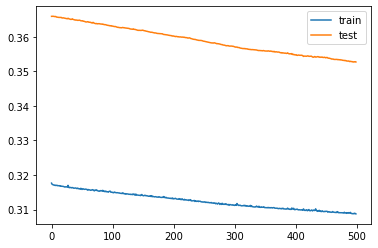

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [67]:
absolute_percentage_error(y_test, model.predict(X_test).reshape(-1))

0.3527137707681914